**Data Science & Business Analytics**

TASK 1

PREDICTION USING SUPERVISED ML


Author : Vishal Simanchal Bhunya

Prediction Statement : What will be the predicted score if a student studies for 9.25 hrs/day?

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

In [1]:
#Importing the required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
%matplotlib inline

Reading the data

In [3]:
#Reading data from given link
df=pd.read_csv("http://bit.ly/w-data")
print("Data imported succesfully")
df.head(10)

Data imported succesfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Data Exploration**

In [5]:
#Statistical representation of data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Data Visualization**

Now lets plot a 2D graph of hours and Scores with the given dataset to see a relationship between the data

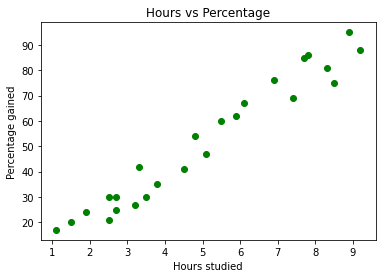

In [6]:
plt.scatter(df.Hours, df.Scores, color='green')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage gained')
plt.show()


Creating Train and Test dataset

The train and test dataset involves splitting the data into training and testing dataset, so that you will train the training set and test the testing set which gives us a better understanding of how well our model generalizes on new data

In [7]:
msk=np.random.rand(len(df))<0.8
train=df[msk]
test=df[~msk]

Simple linear regression on test and train data

**Train Data**

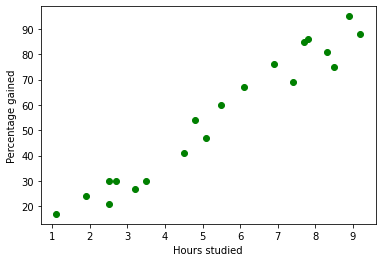

In [9]:
plt.scatter(train.Hours,train.Scores, color='green')
plt.xlabel("Hours studied")
plt.ylabel("Percentage gained")
plt.show()

**Modeling**

In [10]:
train_x = np.asanyarray(train[['Hours']])
train_y = np.asanyarray(train[['Scores']])


**Data Training**

In [11]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (train_x, train_y)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[9.83544438]]
Intercept:  [1.98942311]


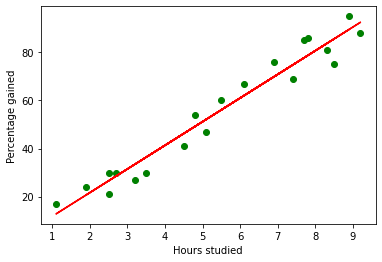

In [12]:
plt.scatter(train_x,train_y,color ='green')
plt.plot(train_x,regr.coef_[0][0]*train_x+regr.intercept_[0],color='red')
plt.xlabel("Hours studied")
plt.ylabel("Percentage gained")
plt.show()

**Test Data**

In [13]:
test_x = np.asanyarray(test[['Hours']])
test_y = np.asanyarray(test[['Scores']])
pred_y=regr.predict(test_x)
pred_y=pred_y.ravel()
test_y=test_y.ravel()

**Making Predictions**

Now that we have trained our algorithm, it's time to make some predictions.

In [14]:
compare=pd.DataFrame({"Actual": test_y,"Predicted": pred_y},index=list(range(0,pred_y.shape[0])))
compare.head()

,Actual,Predicted
0,20,16.742590
1,25,28.545123
2,62,60.018545
3,42,34.446390
4,35,39.364112


If a student studies 9.25 hours/day we need to predict the percentage he gained

In [15]:
user_hours=[[9.25]]
pred_score=regr.predict(user_hours)
print("Hours studied: {}".format(user_hours))
print("Percentage gained: {}".format(pred_score[0]))

Hours studied: [[9.25]]
Percentage gained: [92.96728365]


**Evaluating the Model**

In [16]:
from sklearn import metrics
from sklearn.metrics import r2_score

print("The mean absolute error: %.2f" % np.mean(np.absolute(test_y-pred_y)))
print("Residual sum of squares: %.2f" % np.mean((test_y-pred_y)**2))
print("R2 score: %.2f" % r2_score(test_y,pred_y))

The mean absolute error: 4.14
Residual sum of squares: 20.64
R2 score: 0.91


Conclusion Therefore the simple linear regression model has an R2 score of 0.91.

**Thank You!**